In [155]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Defaulting to user installation because normal site-packages is not writeable


distutils: /home/smb38/.local/lib/python3.9/site-packages
sysconfig: /home/smb38/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [156]:
df = pd.read_csv("data/train.csv")

In [157]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

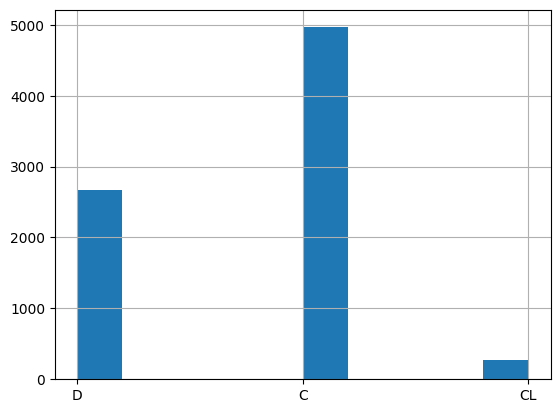

In [159]:
df["Status"].hist()

In [160]:
# unbalanced init!

In [161]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [162]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [163]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [164]:
# nothing empty! lez go

In [165]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [166]:
# create train and validation sets that are divided equally

In [167]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [168]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

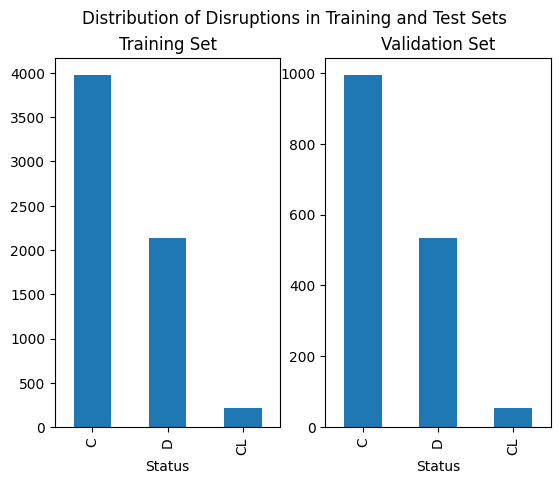

In [169]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [170]:
#the distribution is similar in training and test set

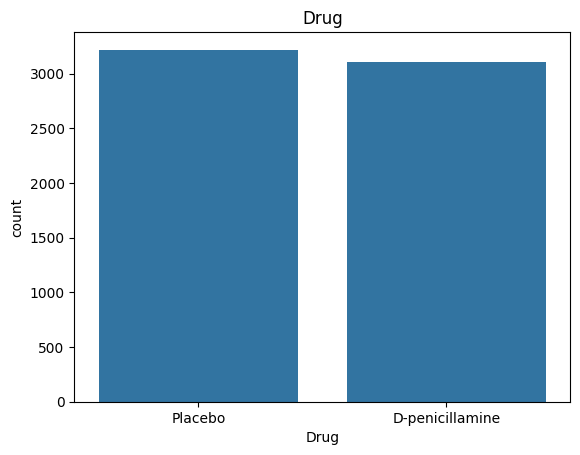

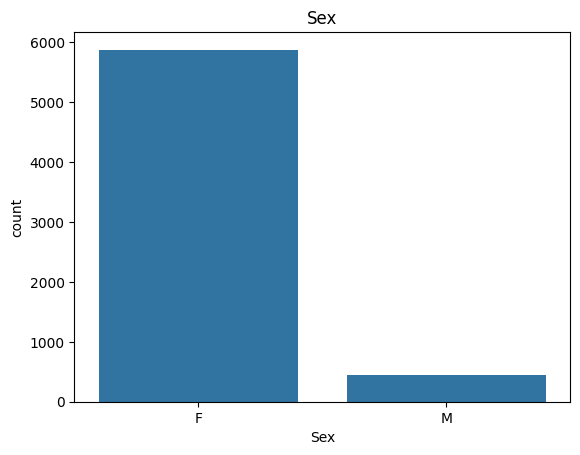

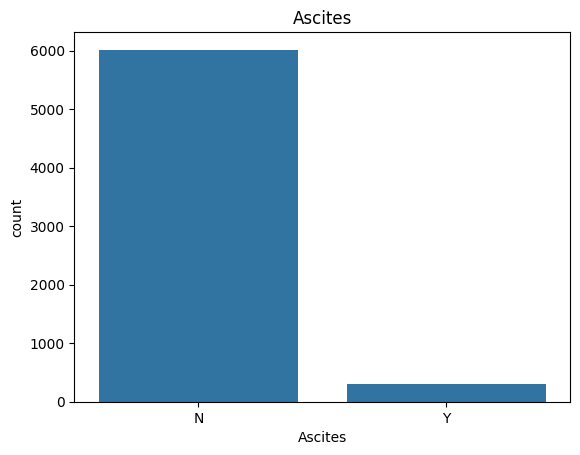

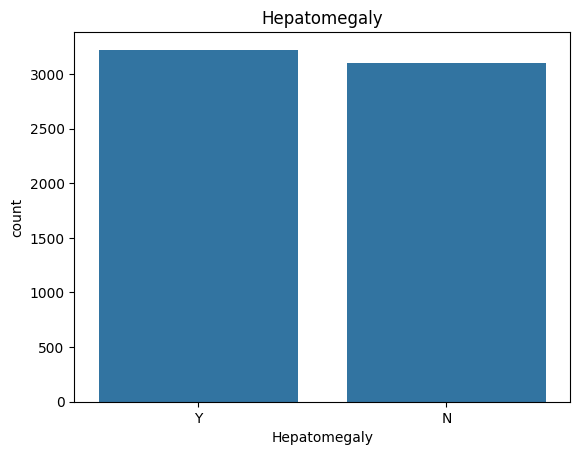

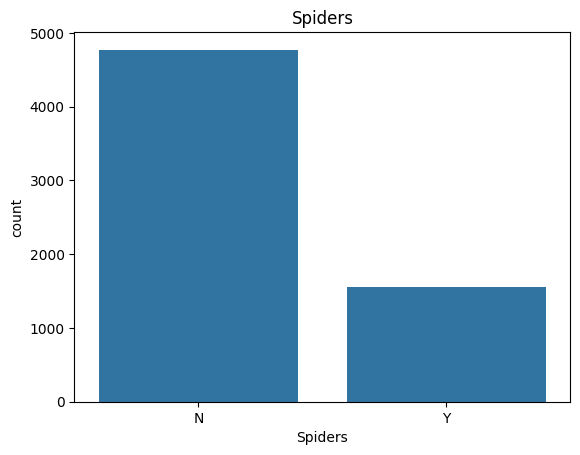

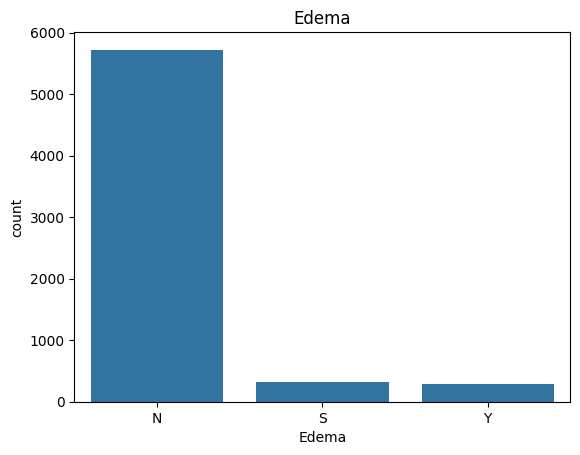

In [171]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [172]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [173]:
# Will do it in the next iteration

In [174]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [175]:
#one hot encode the status and edema

In [176]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [177]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
6261,6261,901,1,14939,0,0,0,0,S,3.2,339.0,3.18,123.0,3336.0,205.0,84.0,304.0,9.9,3.0,CL,False,True,False,False,True,False
131,131,1250,0,22156,0,0,1,1,N,5.5,528.0,3.31,97.0,5184.0,244.9,133.0,467.0,10.6,4.0,D,True,False,False,False,False,True
2731,2731,1874,0,12557,0,0,1,0,N,1.2,468.0,3.61,94.0,13862.4,185.0,185.0,471.0,11.0,3.0,C,True,False,False,True,False,False
7152,7152,3092,1,23331,0,0,0,0,N,0.5,290.0,3.14,108.0,1070.0,127.1,146.0,514.0,10.0,2.0,C,True,False,False,True,False,False
5576,5576,901,1,22369,0,0,1,0,N,1.4,390.0,3.48,73.0,688.0,93.0,93.0,231.0,10.0,4.0,C,True,False,False,True,False,False


In [178]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [179]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [180]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
6261,6261,901,1,14939,0,0,0,0,3.2,339.0,3.18,123.0,3336.0,205.0,84.0,304.0,9.9,3.0,0,1,0,0,1,0
131,131,1250,0,22156,0,0,1,1,5.5,528.0,3.31,97.0,5184.0,244.9,133.0,467.0,10.6,4.0,1,0,0,0,0,1
2731,2731,1874,0,12557,0,0,1,0,1.2,468.0,3.61,94.0,13862.4,185.0,185.0,471.0,11.0,3.0,1,0,0,1,0,0
7152,7152,3092,1,23331,0,0,0,0,0.5,290.0,3.14,108.0,1070.0,127.1,146.0,514.0,10.0,2.0,1,0,0,1,0,0
5576,5576,901,1,22369,0,0,1,0,1.4,390.0,3.48,73.0,688.0,93.0,93.0,231.0,10.0,4.0,1,0,0,1,0,0


In [181]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  int64
S                  int64
Y                  int64
C                  int64
CL                 int64
D                  int64
dtype: object

In [182]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [183]:
#visualise corelation matrix

In [184]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.009603,0.002373,-0.004654,-0.013324,0.010223,0.007151,0.013247,0.013238,-0.010476,-0.025628,0.009599,-0.008622,0.031068,-0.005504,-0.016390,0.009869,-0.017310,-0.003630,-0.008841,0.014321,-0.014218,0.018851,0.007230
N_Days,-0.009603,1.000000,-0.001892,-0.104423,-0.060463,-0.257721,-0.284435,-0.207251,-0.346095,-0.143193,0.254924,-0.284797,-0.034465,-0.235857,-0.195902,0.152838,-0.145949,-0.218054,0.247687,-0.088800,-0.256140,0.342263,-0.066222,-0.324259
Drug,0.002373,-0.001892,1.000000,0.092591,0.043043,0.043793,-0.066100,-0.010838,-0.031906,0.004336,-0.028392,-0.002761,-0.015892,-0.046554,-0.057835,-0.024158,-0.046571,-0.032630,-0.025145,-0.007600,0.043315,-0.021484,0.024077,0.012632
Age,-0.004654,-0.104423,0.092591,1.000000,0.103754,0.155416,0.115272,0.057998,0.102960,-0.053417,-0.118191,0.095068,0.034977,-0.014275,0.022708,-0.098252,0.151776,0.116492,-0.145948,0.071888,0.130545,-0.147504,-0.116058,0.195795
Sex,-0.013324,-0.060463,0.043043,0.103754,1.000000,0.023578,0.058726,-0.027876,0.038012,0.019869,-0.014846,0.152289,0.003898,0.050973,0.073899,-0.044808,0.071986,0.037601,-0.050641,0.069815,-0.001455,-0.124255,0.001159,0.126588
Ascites,0.010223,-0.257721,0.043793,0.155416,0.023578,1.000000,0.185877,0.217181,0.396953,-0.040419,-0.338779,0.276085,0.061409,0.124286,0.125079,-0.176933,0.299680,0.171439,-0.529480,0.077368,0.664724,-0.265591,-0.018680,0.278780
Hepatomegaly,0.007151,-0.284435,-0.066100,0.115272,0.058726,0.185877,1.000000,0.329055,0.301013,0.133439,-0.265507,0.275362,0.130164,0.201954,0.159000,-0.190328,0.256987,0.498102,-0.225570,0.135452,0.176399,-0.395744,0.034373,0.391283
Spiders,0.013247,-0.207251,-0.010838,0.057998,-0.027876,0.217181,0.329055,1.000000,0.250944,0.039671,-0.223228,0.260432,0.069441,0.149390,0.082141,-0.171155,0.274484,0.284404,-0.263082,0.136803,0.227796,-0.320322,0.024006,0.318190
Bilirubin,0.013238,-0.346095,-0.031906,0.102960,0.038012,0.396953,0.301013,0.250944,1.000000,0.303105,-0.308676,0.437268,0.124008,0.366024,0.310862,-0.083218,0.290534,0.203003,-0.330971,0.138203,0.321903,-0.420653,0.011818,0.425493
Cholesterol,-0.010476,-0.143193,0.004336,-0.053417,0.019869,-0.040419,0.133439,0.039671,0.303105,1.000000,-0.083403,0.168350,0.127972,0.323903,0.274072,0.088252,0.026158,0.043382,0.031359,-0.003341,-0.040662,-0.188748,0.055515,0.171456


<Axes: >

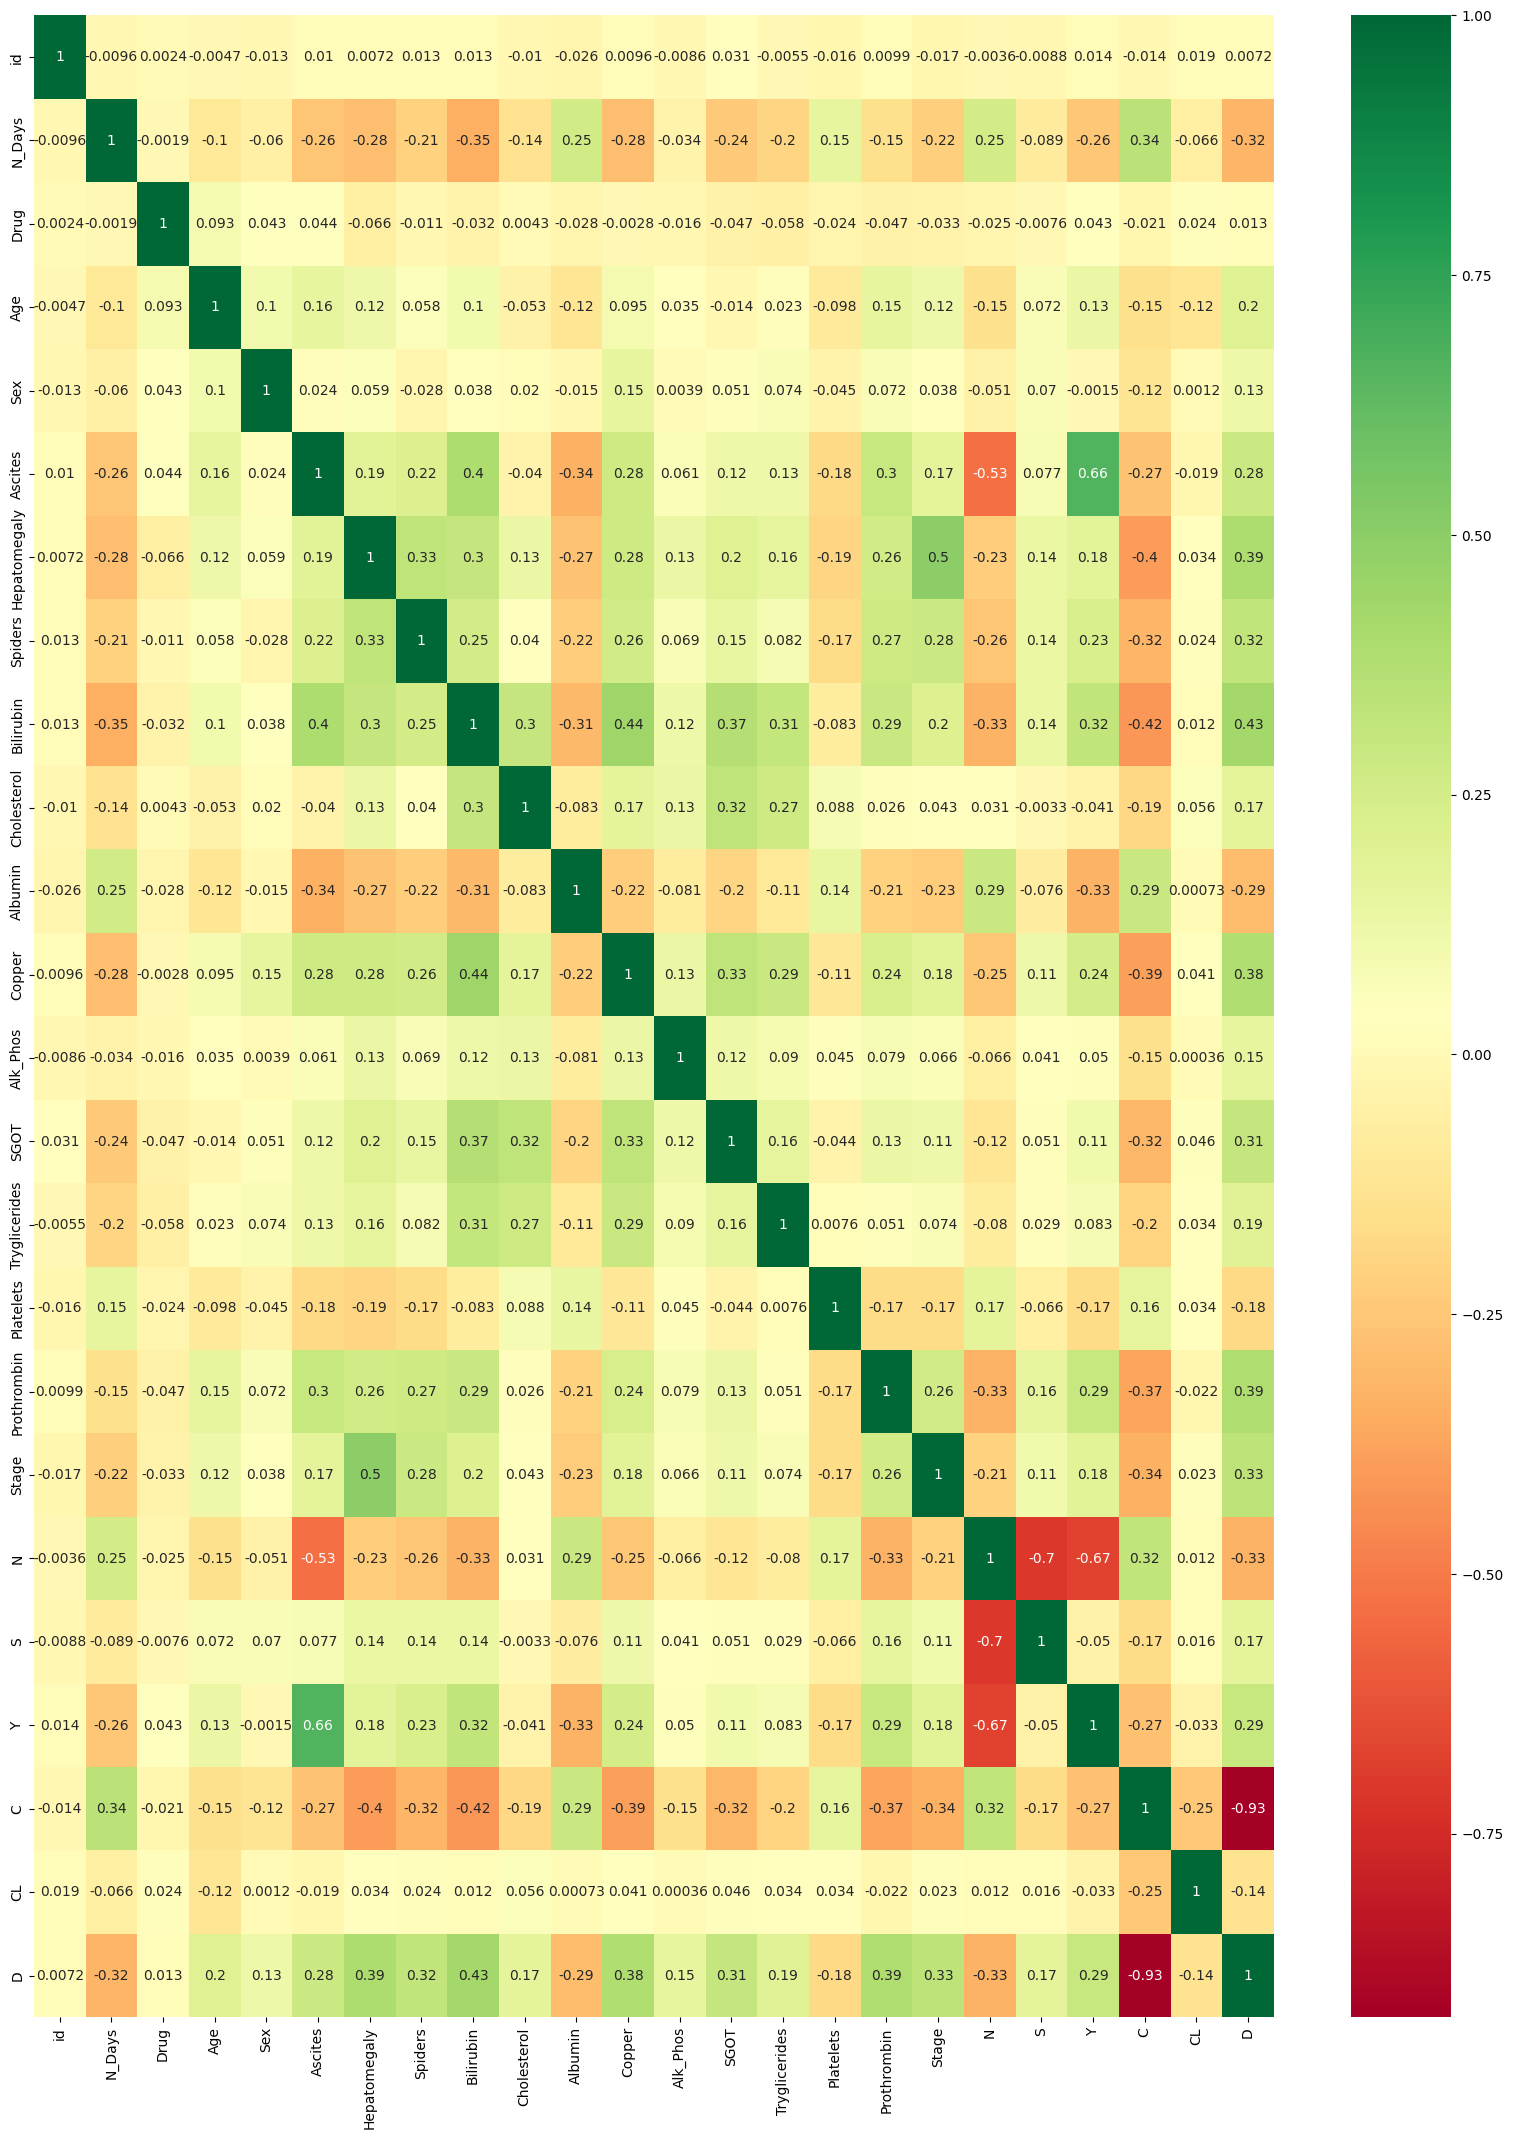

In [185]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [186]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]

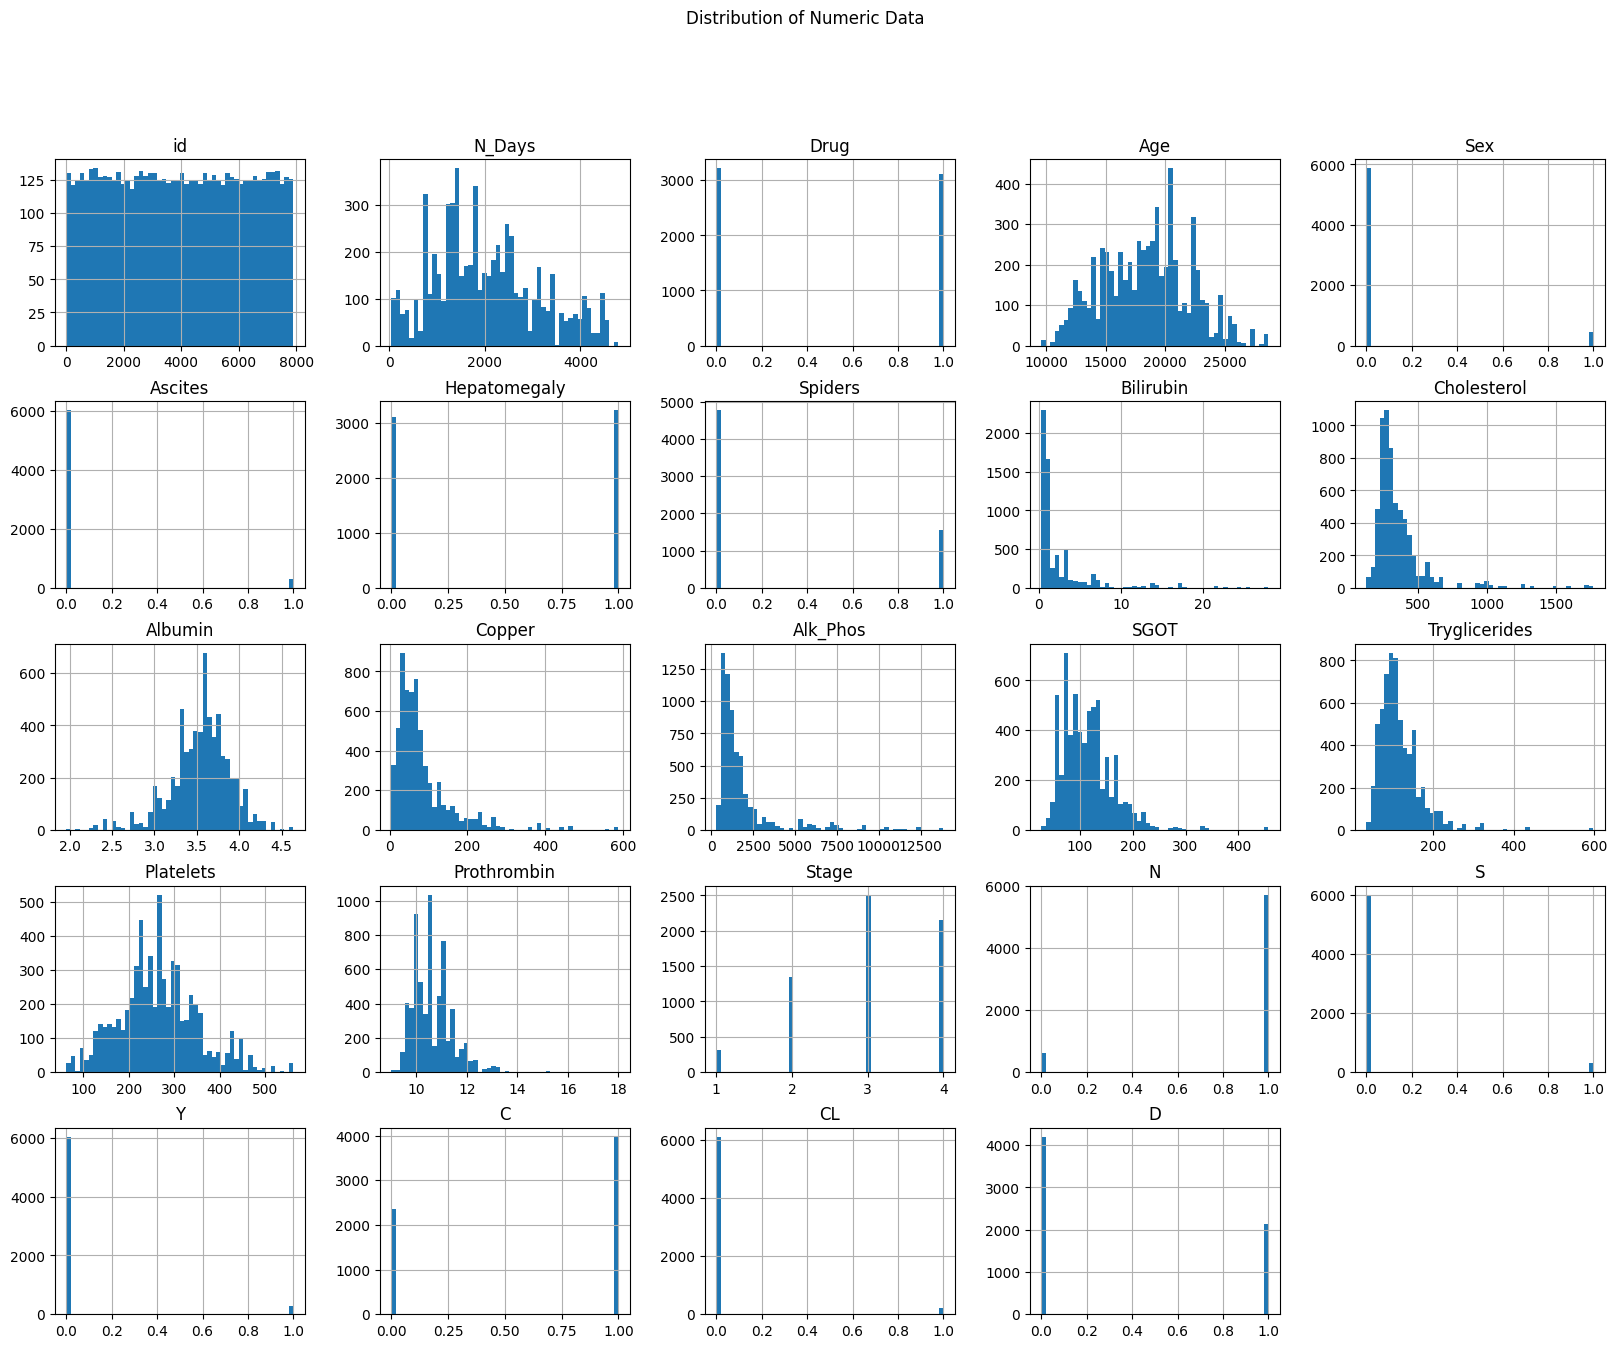

In [187]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [188]:
#Most of the data here needs to be normalised, mostly right skewed

In [189]:
# lets look at the ones that matter

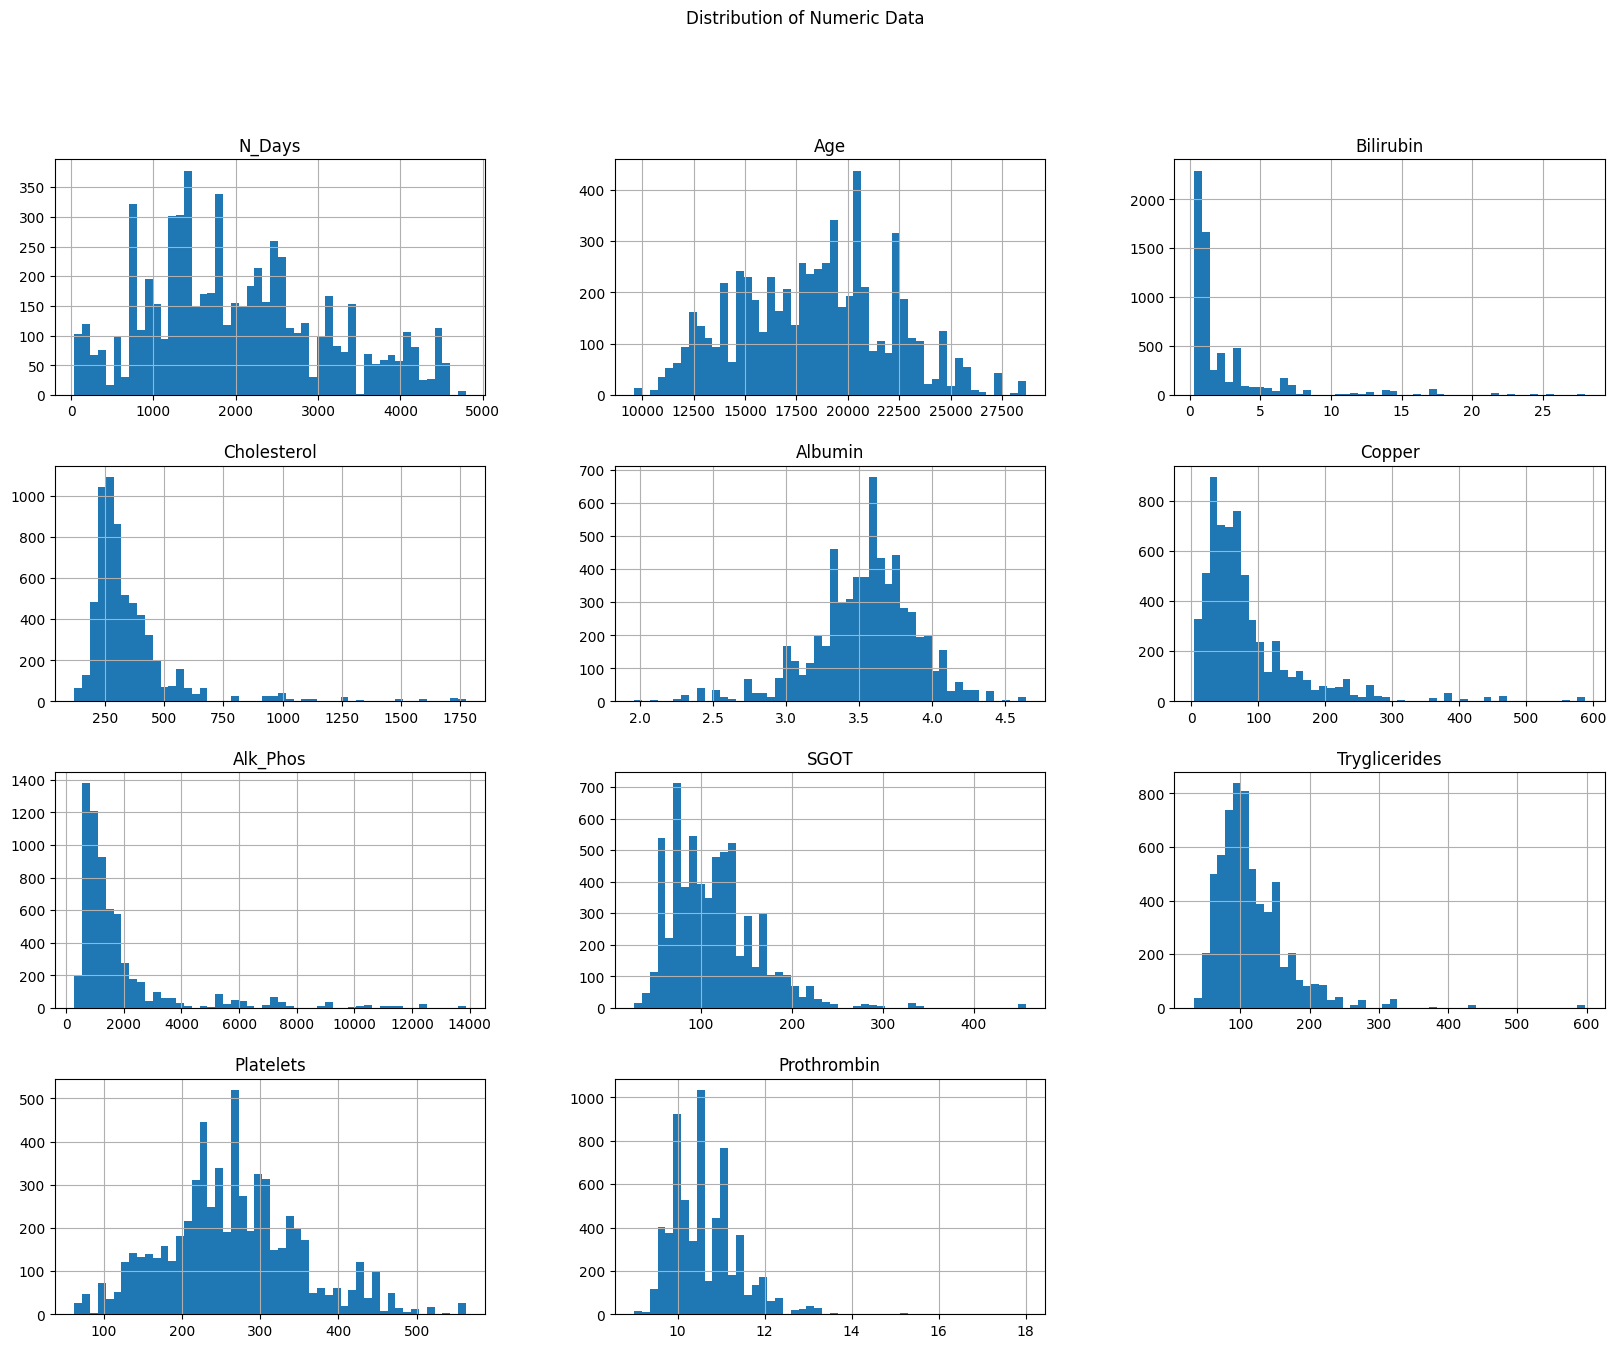

In [190]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [192]:
# viz after scaling

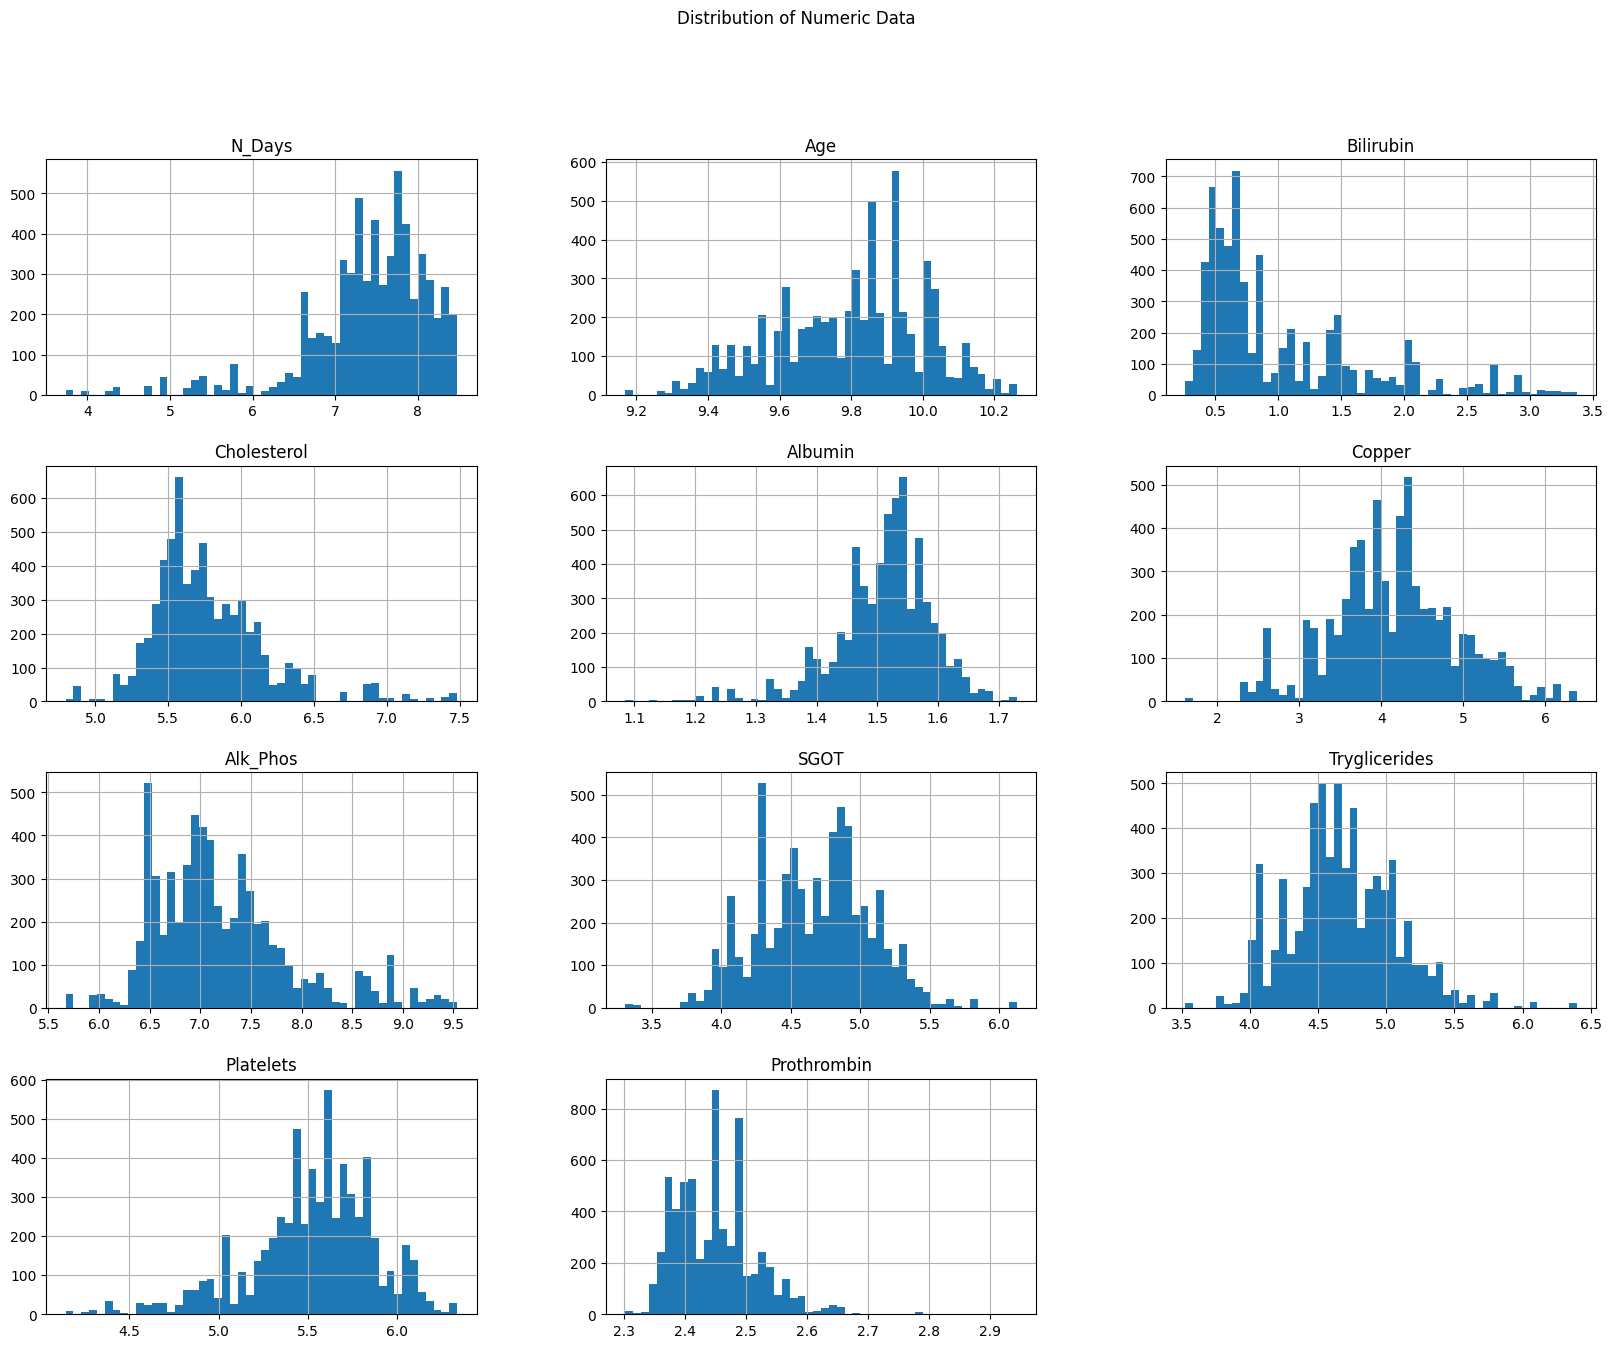

In [193]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [194]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

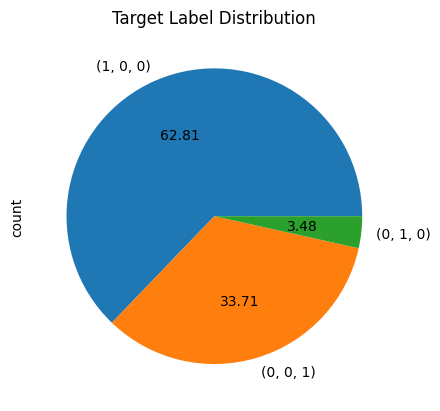

In [195]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [196]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [197]:
# for the next step i presume

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 6261 to 6156
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N         

In [199]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [249]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()
train_copy = train_copy.drop('id',axis=1)
train_copy_1 = train_copy.copy()

In [250]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy_1, 0.1, 0.1)

In [252]:
train_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 6261 to 6156
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6272 non-null   float64
 1   Drug           6275 non-null   float64
 2   Age            6256 non-null   float64
 3   Sex            6274 non-null   float64
 4   Ascites        6271 non-null   float64
 5   Hepatomegaly   6269 non-null   float64
 6   Spiders        6270 non-null   float64
 7   Bilirubin      6255 non-null   float64
 8   Cholesterol    6273 non-null   float64
 9   Albumin        6271 non-null   float64
 10  Copper         6267 non-null   float64
 11  Alk_Phos       6269 non-null   float64
 12  SGOT           6268 non-null   float64
 13  Tryglicerides  6271 non-null   float64
 14  Platelets      6266 non-null   float64
 15  Prothrombin    6269 non-null   float64
 16  Stage          6270 non-null   float64
 17  N              6269 non-null   float64
 18  S         

In [253]:
NaN_count = train_copy_1.isna().sum(axis = 0)
NaN_count

N_Days           52
Drug             49
Age              68
Sex              50
Ascites          53
Hepatomegaly     55
Spiders          54
Bilirubin        69
Cholesterol      51
Albumin          53
Copper           57
Alk_Phos         55
SGOT             56
Tryglicerides    53
Platelets        58
Prothrombin      55
Stage            54
N                55
S                41
Y                51
C                63
CL               67
D                45
dtype: int64

## KNN imputation

In [240]:
from sklearn.impute import KNNImputer

In [254]:
train_copy_1.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
6261,6.804615,1.0,9.611797,0.0,0.0,0.0,0.0,1.435085,5.828946,1.430311,4.820282,8.112827,5.327876,4.442651,5.720312,2.388763,3.0,0.0,1.0,0.0,0.0,1.0,0.0
131,7.131699,0.0,10.005909,0.0,0.0,1.0,1.0,1.871802,6.270988,1.460938,4.584967,8.553525,5.504925,4.897840,6.148468,2.451005,4.0,1.0,0.0,0.0,0.0,0.0,1.0
2731,7.536364,0.0,9.438113,0.0,0.0,1.0,0.0,0.788457,6.150603,1.528228,4.553877,9.537008,5.225747,5.225747,6.156979,2.484907,3.0,1.0,0.0,0.0,1.0,0.0,0.0
7152,8.036897,1.0,10.057581,0.0,0.0,0.0,0.0,0.405465,5.673323,1.420696,4.691348,6.976348,4.852811,4.990433,6.244167,2.397895,2.0,1.0,0.0,0.0,1.0,0.0,0.0
5576,6.804615,1.0,10.015476,0.0,0.0,1.0,0.0,0.875469,5.968708,1.499623,4.304065,6.535241,4.543295,4.543295,5.446737,2.397895,4.0,1.0,0.0,0.0,1.0,0.0,0.0


In [242]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15)

In [255]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy_1)

In [256]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train_copy.columns)

In [257]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [258]:
KNN_imputed_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,6.804615,1.0,9.611797,0.0,0.0,0.0,0.0,1.435085,5.828946,1.430311,4.820282,8.112827,5.327876,4.442651,5.720312,2.388763,3.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7.131699,0.0,10.005909,0.0,0.0,1.0,1.0,1.871802,6.270988,1.460938,4.584967,8.553525,5.504925,4.897840,6.148468,2.451005,4.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7.536364,0.0,9.438113,0.0,0.0,1.0,0.0,0.788457,6.150603,1.528228,4.553877,9.537008,5.225747,5.225747,6.156979,2.484907,3.0,1.0,0.0,0.0,1.0,0.0,0.0
3,8.036897,1.0,10.057581,0.0,0.0,0.0,0.0,0.405465,5.673323,1.420696,4.691348,6.976348,4.852811,4.990433,6.244167,2.397895,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.804615,1.0,10.015476,0.0,0.0,1.0,0.0,0.875469,5.968708,1.499623,4.304065,6.535241,4.543295,4.543295,5.446737,2.397895,4.0,1.0,0.0,0.0,1.0,0.0,0.0


In [260]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_copy.values, KNN_imputed_df.values)
print(f"Mean Squared Error for KNN imputation is : {mse}")

Mean Squared Error for KNN imputation is : 0.001216819541034904


## Median Imputation

In [261]:
from sklearn.impute import SimpleImputer

In [262]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [263]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer.fit_transform(train_copy_1)

In [264]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train_copy.columns)

In [265]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [266]:
Median_imputed_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,6.804615,1.0,9.611797,0.0,0.0,0.0,0.0,1.435085,5.828946,1.430311,4.820282,8.112827,5.327876,4.442651,5.720312,2.388763,3.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7.131699,0.0,10.005909,0.0,0.0,1.0,1.0,1.871802,6.270988,1.460938,4.584967,8.553525,5.504925,4.897840,6.148468,2.451005,4.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7.536364,0.0,9.438113,0.0,0.0,1.0,0.0,0.788457,6.150603,1.528228,4.553877,9.537008,5.225747,5.225747,6.156979,2.484907,3.0,1.0,0.0,0.0,1.0,0.0,0.0
3,8.036897,1.0,10.057581,0.0,0.0,0.0,0.0,0.405465,5.673323,1.420696,4.691348,6.976348,4.852811,4.990433,6.244167,2.397895,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.804615,1.0,10.015476,0.0,0.0,1.0,0.0,0.875469,5.968708,1.499623,4.304065,6.535241,4.543295,4.543295,5.446737,2.397895,4.0,1.0,0.0,0.0,1.0,0.0,0.0


In [267]:
# measuring the MSE between the original and imputed dataframes
mse = mean_squared_error(train_copy.values, Median_imputed_df.values)
print(f"Mean Squared Error for Median Imputation is : {mse}")

Mean Squared Error for Median Imputation is : 0.002329867267190287


# MICE (Multiple Imputation by Chained Equation) Imputation

In [269]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [283]:
train_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 6261 to 6156
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6272 non-null   float64
 1   Drug           6275 non-null   float64
 2   Age            6256 non-null   float64
 3   Sex            6274 non-null   float64
 4   Ascites        6271 non-null   float64
 5   Hepatomegaly   6269 non-null   float64
 6   Spiders        6270 non-null   float64
 7   Bilirubin      6255 non-null   float64
 8   Cholesterol    6273 non-null   float64
 9   Albumin        6271 non-null   float64
 10  Copper         6267 non-null   float64
 11  Alk_Phos       6269 non-null   float64
 12  SGOT           6268 non-null   float64
 13  Tryglicerides  6271 non-null   float64
 14  Platelets      6266 non-null   float64
 15  Prothrombin    6269 non-null   float64
 16  Stage          6270 non-null   float64
 17  N              6269 non-null   float64
 18  S         

In [273]:
imputer3 = IterativeImputer(random_state=100, max_iter=10)

In [277]:
train3_imputed_data = imputer3.fit_transform(train_copy_1)

In [278]:
train3_imputed_df = pd.DataFrame(train3_imputed_data, columns=train_copy.columns)

In [279]:
train3_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6324 non-null   float64
 1   Drug           6324 non-null   float64
 2   Age            6324 non-null   float64
 3   Sex            6324 non-null   float64
 4   Ascites        6324 non-null   float64
 5   Hepatomegaly   6324 non-null   float64
 6   Spiders        6324 non-null   float64
 7   Bilirubin      6324 non-null   float64
 8   Cholesterol    6324 non-null   float64
 9   Albumin        6324 non-null   float64
 10  Copper         6324 non-null   float64
 11  Alk_Phos       6324 non-null   float64
 12  SGOT           6324 non-null   float64
 13  Tryglicerides  6324 non-null   float64
 14  Platelets      6324 non-null   float64
 15  Prothrombin    6324 non-null   float64
 16  Stage          6324 non-null   float64
 17  N              6324 non-null   float64
 18  S       

In [280]:
train3_imputed_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,6.804615,1.0,9.611797,0.0,0.0,0.0,0.0,1.435085,5.828946,1.430311,4.820282,8.112827,5.327876,4.442651,5.720312,2.388763,3.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7.131699,0.0,10.005909,0.0,0.0,1.0,1.0,1.871802,6.270988,1.460938,4.584967,8.553525,5.504925,4.897840,6.148468,2.451005,4.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7.536364,0.0,9.438113,0.0,0.0,1.0,0.0,0.788457,6.150603,1.528228,4.553877,9.537008,5.225747,5.225747,6.156979,2.484907,3.0,1.0,0.0,0.0,1.0,0.0,0.0
3,8.036897,1.0,10.057581,0.0,0.0,0.0,0.0,0.405465,5.673323,1.420696,4.691348,6.976348,4.852811,4.990433,6.244167,2.397895,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.804615,1.0,10.015476,0.0,0.0,1.0,0.0,0.875469,5.968708,1.499623,4.304065,6.535241,4.543295,4.543295,5.446737,2.397895,4.0,1.0,0.0,0.0,1.0,0.0,0.0


In [281]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
6261,6261,6.804615,1,9.611797,0,0,0,0,1.435085,5.828946,1.430311,4.820282,8.112827,5.327876,4.442651,5.720312,2.388763,3.0,0,1,0,0,1,0
131,131,7.131699,0,10.005909,0,0,1,1,1.871802,6.270988,1.460938,4.584967,8.553525,5.504925,4.897840,6.148468,2.451005,4.0,1,0,0,0,0,1
2731,2731,7.536364,0,9.438113,0,0,1,0,0.788457,6.150603,1.528228,4.553877,9.537008,5.225747,5.225747,6.156979,2.484907,3.0,1,0,0,1,0,0
7152,7152,8.036897,1,10.057581,0,0,0,0,0.405465,5.673323,1.420696,4.691348,6.976348,4.852811,4.990433,6.244167,2.397895,2.0,1,0,0,1,0,0
5576,5576,6.804615,1,10.015476,0,0,1,0,0.875469,5.968708,1.499623,4.304065,6.535241,4.543295,4.543295,5.446737,2.397895,4.0,1,0,0,1,0,0


In [282]:
# measuring the MSE between the original and imputed dataframes 
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(train_copy.values, train3_imputed_df.values)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 0.001160440448221526


## Comparing the Imputation methods using XGBoost!

#TODO: Run the pipeline to make sure the test aligns with the pre-procesessing

In [288]:
from sklearn.metrics import roc_curve, auc, log_loss
from xgboost import XGBClassifier

In [284]:
validation_copy = validation.copy()

In [285]:

xgbClassificationModel = XGBClassifier() 

In [286]:
# xgbClassificationModel.fit(X_train, y_train)

In [287]:
# trainscore =  xgbClassificationModel.score(X_train,y_train)
# testscore =  xgbClassificationModel.score(X_test,y_test)  

# print("test score: {} train score: {}".format(testscore,trainscore),'\n')

In [289]:
# y_pred =  xgbClassificationModel.predict(X_test)
# y_pred_prob = xgbClassificationModel.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)
# #one for log loss 

# cm=confusion_matrix(y_test, y_pred)

# print(' f1 score: ',f1_score(y_test, y_pred),'\n')
# print(' precision score: ',precision_score(y_test, y_pred),'\n')
# print(' recall score: ',recall_score(y_test, y_pred),'\n')
# print(classification_report(y_test, y_pred))

# sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# sns.heatmap(cm,annot = True, fmt = 'd')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()